In [275]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# import scikit learn
import sklearn

from sklearn import datasets
# --------------------------------------
from sklearn import preprocessing
# --------------------------------------
from sklearn.model_selection import train_test_split
# --------------------------------------
from sklearn.preprocessing import LabelEncoder
# --------------------------------------
from sklearn.decomposition import PCA
# --------------------------------------
from sklearn.model_selection import GridSearchCV 
# --------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# --------------------------------------
import warnings

import numpy as np
# --------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# --------------------------------------
warnings.simplefilter("ignore")
%matplotlib inline

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score

from sklearn.datasets import fetch_20newsgroups
from sklearn import datasets

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# linear regression
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [278]:
#data crawling all films
list_of_ganers =["sci-fi","comedy","Action","Adventure","Drama","Fantasy","Family","Romance","Crime","Sport","Mystery","Musical"]
rating=[]
rating2=[]
runtimes=[]
ganers=[]
years=[]
for_childs=[]
votes=[]
names=[]
links = []
for ganer_in_list in list_of_ganers:
    i=1
    url = "https://www.imdb.com/search/title/?title_type=movie&genres="+ganer_in_list+"&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt"
    page = requests.get(url)
    while (page.status_code == 200):
        if(i==751):
            break

        url ="https://www.imdb.com/search/title/?title_type=movie&genres="+ganer_in_list+"&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt"
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")
        x = soup.find("div", class_="lister list detail sub-list")
    
        job_elements = x.find_all("div", class_="lister-item mode-advanced")
        i = i+50
        for job_element in job_elements:
            
            nameso= job_element.find("h3",class_="lister-item-header")
            nameso2 =nameso.find("a")
            links.append(nameso.get('href'))
            names.append(nameso2.get_text())
            

            for_childe=job_element.find("span",class_="certificate")
            if for_childe:
                for_childs.append(for_childe.get_text())
            else:
                for_childs.append(None)


            ratingo=job_element.find("div",class_="inline-block ratings-imdb-rating")
            if(ratingo):
                ratingo2222=ratingo.find("strong")
                rating.append(float(ratingo2222.get_text()))
            else:
                rating.append(None)

            ratingo2=job_element.find("div",class_="inline-block ratings-metascore")
            if ratingo2:
                ratingo21=ratingo2.find("span",class_="metascore favorable")
                if(ratingo21):
                    rating2.append(int(ratingo21.get_text()))
            else:
                rating2.append(None)

            runtime=job_element.find("span",class_="runtime")
            if runtime:
                runtimes.append(runtime.get_text()[0:3])
            else:
                runtimes.append(None)

            ganere=job_element.find("span",class_="genre")
            if ganere:
                ganers.append(ganere.get_text()[1:])
            else:
                ganers.append(None)
            
            yearsfind=job_element.find("span",class_="lister-item-year text-muted unbold")
            if yearsfind:
                strippedText = str(yearsfind.get_text()).replace('(','').replace(')','').replace('I','').replace('V',"").replace('X',"")
                if(strippedText!=""):
                    years.append(int(strippedText))
                else:
                      years.append(None)
            else:
                 years.append(None)

            vote=job_element.find_all("p",class_="sort-num_votes-visible")
            if(vote):
                vote2=vote[0].find_all("span")
                if vote2:
                    vote3=vote2[1]
                    if vote3:
                        xu = vote3.get_text().replace(",", "")
                        votes.append(int(xu))
                    else:
                        votes.append(None)
                else:
                     votes.append(None)
            else:
                votes.append(None)


df1 = pd.DataFrame(list(zip( names,rating,rating2,runtimes,ganers,for_childs,votes,years)),
               columns =['name','imdb_score','Metascore','runtime','ganer','film_ratings','votes',"year"])   

print(df1)





                                             name  imdb_score  Metascore  \
0     Doctor Strange in the Multiverse of Madness         7.4       81.0   
1               Everything Everywhere All at Once         8.8       71.0   
2                         Spider-Man: No Way Home         8.4        NaN   
3                            Sonic the Hedgehog 2         6.7        NaN   
4                         Jurassic World Dominion         NaN       72.0   
...                                           ...         ...        ...   
5131                                        Dumbo         7.2        NaN   
5132                                 Stan & Ollie         7.2        NaN   
5133                                     Barnyard         5.6        NaN   
5134                                    Pollyanna         7.4        NaN   
5135                                    SpaceCamp         5.7        NaN   

     runtime                                     ganer film_ratings     votes  \
0     

In [279]:
#data crawling all nominees 
listo =[]
winner_or_loser=[]
rating=[]
rating2=[]
runtimes=[]
names=[]
ganers=[]
for_childs=[]
votes=[]
votes=[]
years=[]
i=1
url = "https://www.imdb.com/list/ls009487211/?sort=list_order,asc&st_dt=&mode=detail&page=" + str(i)
while (i<6):
    i = i+1
    page = requests.get(url)
    if page.status_code != 200:
        break
    url = "https://www.imdb.com/list/ls009487211/?sort=list_order,asc&st_dt=&mode=detail&page=" + str(i)
    soup = BeautifulSoup(page.content, "html.parser")
    job_elements = soup.find_all("div", class_="lister-item mode-detail")
    for job_element in job_elements:
        bla = job_element.find_all("a")
        listo.append(bla[1].get_text())
        winner_or_loser.append(1)
        for_childe=job_element.find("span",class_="certificate")
        if for_childe:
            for_childs.append(for_childe.get_text())
        else:
            for_childs.append(None)
        yearsfind=job_element.find("span",class_="lister-item-year text-muted unbold")
        if yearsfind:
                strippedText = str(yearsfind.get_text()).replace('(','').replace(')','').replace('I','').replace('V',"").replace('X',"")
                if(strippedText!=""):
                    years.append(int(strippedText))
                else:
                    years.append(None)
        else:
                 years.append(None)

        ratingo=job_element.find("span",class_="ipl-rating-star__rating")
        rating.append(float(ratingo.get_text()))

        ratingo2=job_element.find("div",class_="inline-block ratings-metascore")
        if ratingo2:
            ratingo21=ratingo2.find("span")
            rating2.append(int(ratingo21.get_text()))
        else:
            rating2.append(None)

        runtime=job_element.find("span",class_="runtime")
        if runtime:
            runtimes.append(runtime.get_text()[0:3])
        else:
            runtimes.append(None)
            #print(type(runtime))

        ganere=job_element.find("span",class_="genre")
        if ganere:
            ganers.append(ganere.get_text()[1:])
        else:
            ganers.append(None)
        nameso= job_element.find("h3",class_="lister-item-header")
        nameso2 =nameso.find("a")
        names.append(nameso2.get_text())

        vote=job_element.find_all("p",class_="text-muted text-small")
        vote2=vote[2].find_all("span")
        vote3=vote2[1]
        if vote3:
            xu = vote3.get_text().replace(",", "")
            votes.append(xu)
        else:
            votes.append(None)



df_nominee= pd.DataFrame(list(zip( names,rating,rating2,runtimes,ganers,for_childs,votes,years,winner_or_loser)),
               columns =['name','imdb_score','Metascore','runtime','ganer','film_ratings','votes',"year",'nominee']) 



In [280]:
df_nominee

,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,nominee
0,Nomadland,7.3,93.0,107,Drama,R,150982,2020,1
1,The Father,8.3,88.0,97,"Drama, Mystery",PG-13,135072,2020,1
2,Judas and the Black Messiah,7.4,85.0,126,"Biography, Drama, History",R,73511,2021,1
3,Mank,6.8,79.0,131,"Biography, Comedy, Drama",R,71530,2020,1
4,Minari,7.4,89.0,115,Drama,PG-13,74933,2020,1
...,...,...,...,...,...,...,...,...,...
475,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20887,1939,1
476,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6017,1939,1
477,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48216,1939,1
478,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,389934,1939,1


In [281]:
#data merging
df1['nominee'] = 0
df2 = pd.concat([df1, df_nominee], axis=0, join="inner",ignore_index=True)

print(df2['nominee'].value_counts())
df2



0    5136
1     480
Name: nominee, dtype: int64


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,nominee
0,Doctor Strange in the Multiverse of Madness,7.4,81.0,126,"Action, Adventure, Fantasy",PG-13,131959.0,2022.0,0
1,Everything Everywhere All at Once,8.8,71.0,139,"Action, Adventure, Comedy",R,40073.0,2022.0,0
2,Spider-Man: No Way Home,8.4,NaN,148,"Action, Adventure, Fantasy",PG-13,627419.0,2021.0,0
3,Sonic the Hedgehog 2,6.7,NaN,122,"Action, Adventure, Comedy",PG,30079.0,2022.0,0
4,Jurassic World Dominion,NaN,72.0,146,"Action, Adventure, Sci-Fi",PG-13,NaN,2022.0,0
...,...,...,...,...,...,...,...,...,...
5611,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20887,1939.0,1
5612,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6017,1939.0,1
5613,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48216,1939.0,1
5614,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,389934,1939.0,1


In [282]:
def remove_duplicatives(df, col_name=None):
    if(col_name==None):
        return df.drop_duplicates(keep='last').copy()
    else:
        return df.drop_duplicates(col_name,keep='last').copy()

In [283]:
df3=remove_duplicatives(df2,"name")
df3
print(df3['nominee'].value_counts())


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,nominee
49,Alien,8.5,75.0,117,"Horror, Sci-Fi",16,853683.0,1979.0,0
62,Nope,NaN,91.0,None,"Horror, Sci-Fi",None,NaN,2022.0,0
149,Alien: Covenant,6.4,80.0,122,"Horror, Sci-Fi, Thriller",R,274792.0,2017.0,0
183,Reminiscence,5.8,64.0,116,"Mystery, Romance, Sci-Fi",PG-13,51353.0,2021.0,0
195,Invaders from Mars,6.3,65.0,78,"Horror, Sci-Fi",None,7872.0,1953.0,0
...,...,...,...,...,...,...,...,...,...
5611,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20887,1939.0,1
5612,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6017,1939.0,1
5613,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48216,1939.0,1
5614,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,389934,1939.0,1


0    2669
1     479
Name: nominee, dtype: int64


In [284]:
 df3.isna().sum()

name               0
imdb_score       126
Metascore       1072
runtime          106
ganer              0
film_ratings     936
votes            126
year              18
nominee            0
dtype: int64

In [285]:
#### removing rows of year 2022 (no nominees from this year yet)
df4 = df3[df3.year != 2022]

df4


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,nominee
49,Alien,8.5,75.0,117,"Horror, Sci-Fi",16,853683.0,1979.0,0
149,Alien: Covenant,6.4,80.0,122,"Horror, Sci-Fi, Thriller",R,274792.0,2017.0,0
183,Reminiscence,5.8,64.0,116,"Mystery, Romance, Sci-Fi",PG-13,51353.0,2021.0,0
195,Invaders from Mars,6.3,65.0,78,"Horror, Sci-Fi",None,7872.0,1953.0,0
199,Bird Box,6.6,63.0,124,"Horror, Sci-Fi",R,325421.0,2018.0,0
...,...,...,...,...,...,...,...,...,...
5611,Ninotchka,7.8,NaN,110,"Comedy, Romance",None,20887,1939.0,1
5612,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",None,6017,1939.0,1
5613,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",None,48216,1939.0,1
5614,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,389934,1939.0,1


In [286]:
 df4.isna().sum()

name               0
imdb_score        54
Metascore       1023
runtime           53
ganer              0
film_ratings     837
votes             54
year              18
nominee            0
dtype: int64

In [287]:
#missing values handling
df4['Metascore'] = df4['Metascore'].fillna(0)
df4['film_ratings'] = df4['film_ratings'].fillna("Unrated")
df4['year'] = df4['year'].fillna(method="ffill")


df4

,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,nominee
49,Alien,8.5,75.0,117,"Horror, Sci-Fi",16,853683.0,1979.0,0
149,Alien: Covenant,6.4,80.0,122,"Horror, Sci-Fi, Thriller",R,274792.0,2017.0,0
183,Reminiscence,5.8,64.0,116,"Mystery, Romance, Sci-Fi",PG-13,51353.0,2021.0,0
195,Invaders from Mars,6.3,65.0,78,"Horror, Sci-Fi",Unrated,7872.0,1953.0,0
199,Bird Box,6.6,63.0,124,"Horror, Sci-Fi",R,325421.0,2018.0,0
...,...,...,...,...,...,...,...,...,...
5611,Ninotchka,7.8,0.0,110,"Comedy, Romance",Unrated,20887,1939.0,1
5612,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",Unrated,6017,1939.0,1
5613,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",Unrated,48216,1939.0,1
5614,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,389934,1939.0,1


In [288]:
 df4.isna().sum()

name             0
imdb_score      54
Metascore        0
runtime         53
ganer            0
film_ratings     0
votes           54
year             0
nominee          0
dtype: int64

In [289]:
def remove_corrupt_rows(df, num_max_missing_cols):
    return df.dropna( thresh=df.columns.size-num_max_missing_cols).copy()

In [290]:
df5=remove_corrupt_rows(df4,0)
df5


,name,imdb_score,Metascore,runtime,ganer,film_ratings,votes,year,nominee
49,Alien,8.5,75.0,117,"Horror, Sci-Fi",16,853683.0,1979.0,0
149,Alien: Covenant,6.4,80.0,122,"Horror, Sci-Fi, Thriller",R,274792.0,2017.0,0
183,Reminiscence,5.8,64.0,116,"Mystery, Romance, Sci-Fi",PG-13,51353.0,2021.0,0
195,Invaders from Mars,6.3,65.0,78,"Horror, Sci-Fi",Unrated,7872.0,1953.0,0
199,Bird Box,6.6,63.0,124,"Horror, Sci-Fi",R,325421.0,2018.0,0
...,...,...,...,...,...,...,...,...,...
5611,Ninotchka,7.8,0.0,110,"Comedy, Romance",Unrated,20887,1939.0,1
5612,Of Mice and Men,7.9,89.0,106,"Adventure, Drama",Unrated,6017,1939.0,1
5613,Stagecoach,7.8,93.0,96,"Adventure, Drama, Western",Unrated,48216,1939.0,1
5614,The Wizard of Oz,8.1,92.0,102,"Adventure, Family, Fantasy",PG,389934,1939.0,1


In [291]:
 df5.isna().sum()

name            0
imdb_score      0
Metascore       0
runtime         0
ganer           0
film_ratings    0
votes           0
year            0
nominee         0
dtype: int64

R            785
Unrated      784
PG-13        726
PG           500
16            42
G             37
18            19
NC-17          3
X              3
GP             2
Not Rated      1
Approved       1
M/PG           1
Name: film_ratings, dtype: int64


<AxesSubplot:ylabel='film_ratings'>

(-1.1100396021522685,
 1.1004780762929651,
 -1.1367513808647067,
 1.1121733539385796)

Text(0.5, 1.0, 'number of apperances in dataframe')

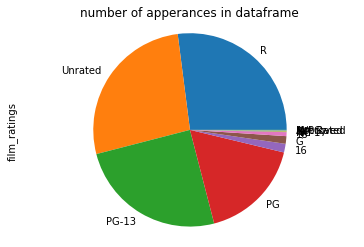

In [292]:
#from string to numaric film_rating column
#EDA
print(df5.film_ratings.value_counts())
df5.film_ratings.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('number of apperances in dataframe')

In [293]:
#from string to numaric film_rating column



df5.loc[df5["film_ratings"] == "Approved","film_ratings"] = int(0)
df5.loc[df5["film_ratings"] == "GP","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "M","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "M/PG","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "Not Rated","film_ratings"] = int(0)
df5.loc[df5["film_ratings"] == "Unrated","film_ratings"] = int(0)
df5.loc[df5["film_ratings"] == "G","film_ratings"] = int(1)
df5.loc[df5["film_ratings"] == "PG","film_ratings"] = int(2)
df5.loc[df5["film_ratings"] == "PG-13","film_ratings"] = int(3)
df5.loc[df5["film_ratings"] == "R","film_ratings"] = int(4)
df5.loc[df5["film_ratings"] == 16,"film_ratings"] = int(5)
df5.loc[df5["film_ratings"] == "NC-17","film_ratings"] = int(6)
df5.loc[df5["film_ratings"] == "X","film_ratings"] = int(6)
df5.loc[df5["film_ratings"] == 18,"film_ratings"] = int(6)


print(df5)


                    name  imdb_score  Metascore runtime  \
49                 Alien         8.5       75.0     117   
149      Alien: Covenant         6.4       80.0     122   
183         Reminiscence         5.8       64.0     116   
195   Invaders from Mars         6.3       65.0     78    
199             Bird Box         6.6       63.0     124   
...                  ...         ...        ...     ...   
5611           Ninotchka         7.8        0.0     110   
5612     Of Mice and Men         7.9       89.0     106   
5613          Stagecoach         7.8       93.0     96    
5614    The Wizard of Oz         8.1       92.0     102   
5615   Wuthering Heights         7.5        0.0     104   

                                       ganer film_ratings     votes    year  \
49                Horror, Sci-Fi                       16  853683.0  1979.0   
149     Horror, Sci-Fi, Thriller                        4  274792.0  2017.0   
183     Mystery, Romance, Sci-Fi                      

In [294]:
#ganers vectorizer  
sample=df5["ganer"]
vectorizer = CountVectorizer()
X_g = vectorizer.fit_transform(sample)
kpok=pd.DataFrame(X_g.toarray(),columns=vectorizer.get_feature_names(),index=df5.index.values.tolist())  
result = pd.concat([df5, kpok], axis=1, join="inner")
print(result)

                    name  imdb_score  Metascore runtime  \
49                 Alien         8.5       75.0     117   
149      Alien: Covenant         6.4       80.0     122   
183         Reminiscence         5.8       64.0     116   
195   Invaders from Mars         6.3       65.0     78    
199             Bird Box         6.6       63.0     124   
...                  ...         ...        ...     ...   
5611           Ninotchka         7.8        0.0     110   
5612     Of Mice and Men         7.9       89.0     106   
5613          Stagecoach         7.8       93.0     96    
5614    The Wizard of Oz         8.1       92.0     102   
5615   Wuthering Heights         7.5        0.0     104   

                                       ganer film_ratings     votes    year  \
49                Horror, Sci-Fi                       16  853683.0  1979.0   
149     Horror, Sci-Fi, Thriller                        4  274792.0  2017.0   
183     Mystery, Romance, Sci-Fi                      

In [313]:
#ganers vectorizer  
df6=result.drop("ganer",axis=1)
#remove movies names
df7=df6.drop("name",axis=1)



In [314]:
df7

,imdb_score,Metascore,runtime,film_ratings,votes,year,nominee,action,adventure,animation,...,music,musical,mystery,noir,romance,sci,sport,thriller,war,western
49,8.5,75.0,117,16,853683.0,1979.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
149,6.4,80.0,122,4,274792.0,2017.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
183,5.8,64.0,116,3,51353.0,2021.0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
195,6.3,65.0,78,0,7872.0,1953.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
199,6.6,63.0,124,4,325421.0,2018.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,7.8,0.0,110,0,20887,1939.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5612,7.9,89.0,106,0,6017,1939.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5613,7.8,93.0,96,0,48216,1939.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5614,8.1,92.0,102,2,389934,1939.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'the conection betwen imdb rating to votes'}, xlabel='imdb_score', ylabel='votes'>

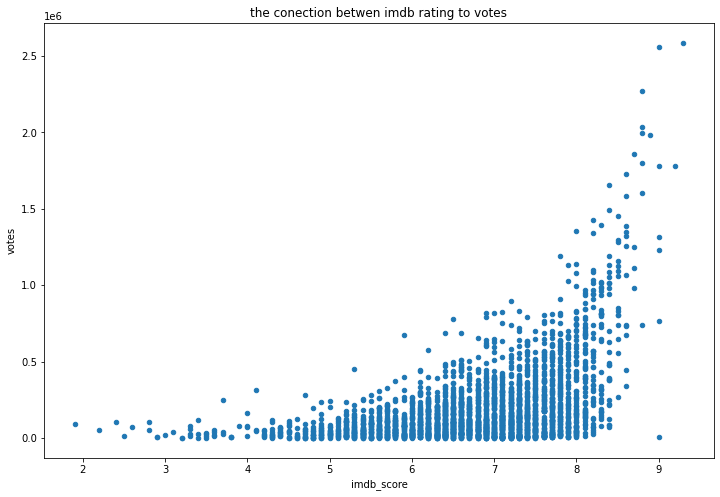

In [315]:
#ויזואליזציה
df7.plot.scatter('imdb_score', 'votes',  
                        figsize=(12,8), title = "the conection betwen imdb rating to votes")


<AxesSubplot:title={'center':'the conection betwen imdb score and nominees'}, xlabel='imdb_score', ylabel='nominee'>

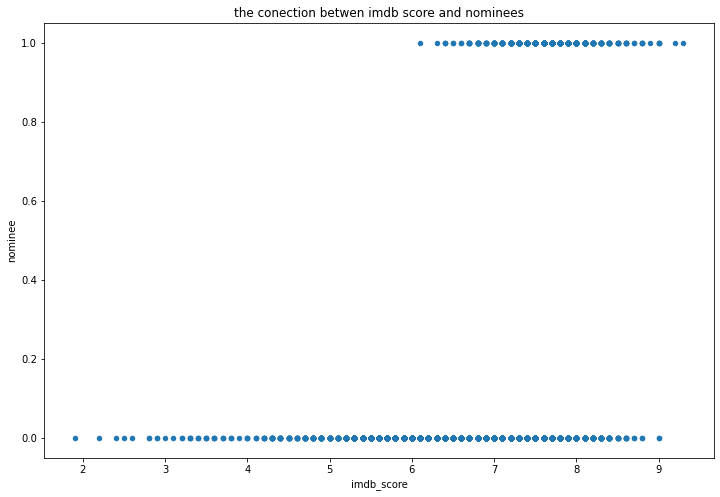

In [316]:
#ויזואליזציה
df7.plot.scatter('imdb_score', 'nominee',  
                        figsize=(12,8), title = "the conection betwen imdb score and nominees")
#we can see the all the nominees movies get betwen 6-9 imdb score

<AxesSubplot:title={'center':'the conection betwen year of the movie and nominees'}, xlabel='year', ylabel='nominee'>

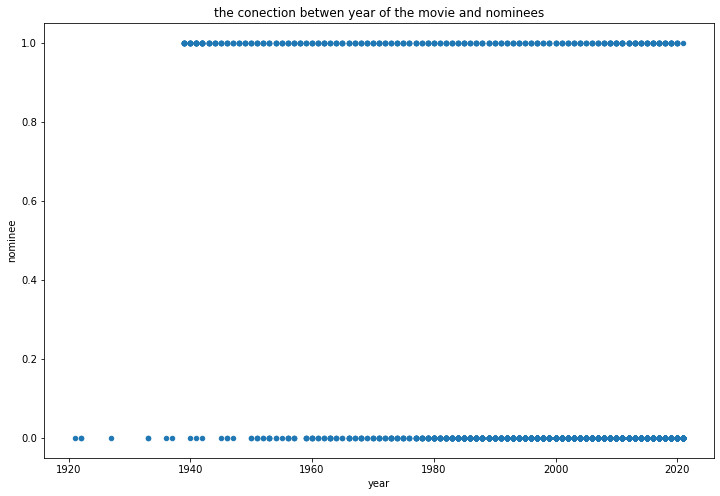

In [317]:
#ויזואליזציה
df7.plot.scatter('year', 'nominee',  
                        figsize=(12,8), title = "the conection betwen year of the movie and nominees")
#we dont see nomaneis before 1940

In [318]:
#pre machine learning
target_column = 'nominee'
y = df7[target_column]
X = df7.drop([target_column],axis=1)


In [319]:
X.dtypes


imdb_score      float64
Metascore       float64
runtime          object
film_ratings     object
votes            object
year            float64
action            int64
adventure         int64
animation         int64
biography         int64
comedy            int64
crime             int64
documentary       int64
drama             int64
family            int64
fantasy           int64
fi                int64
film              int64
history           int64
horror            int64
music             int64
musical           int64
mystery           int64
noir              int64
romance           int64
sci               int64
sport             int64
thriller          int64
war               int64
western           int64
dtype: object

In [320]:
#pre machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [321]:
#scaling
scaler = preprocessing.StandardScaler()
print(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

      imdb_score  Metascore runtime film_ratings     votes    year  action  \
4920         7.3        0.0     109            3   93039.0  2009.0       0   
1371         5.6       84.0     92             4  201750.0  2011.0       0   
4421         6.4       90.0     116            3   25435.0  1999.0       0   
5338         8.1       79.0     128            0    472022  1989.0       0   
4792         5.3       85.0     114            0   31711.0  1980.0       0   
...          ...        ...     ...          ...       ...     ...     ...   
4070         5.6        0.0     91             4   86518.0  2001.0       0   
3167         7.7        0.0     118            3  232452.0  1993.0       0   
3215         6.3        0.0     120            4   49352.0  2021.0       0   
3469         7.7       69.0     95             0  213442.0  1989.0       0   
2708         6.1       65.0     99             4  109908.0  2015.0       0   

      adventure  animation  biography  ...  music  musical  mys

In [322]:
#gridsearch on knn

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [323]:
#best n in knn
print(grid_search.best_params_)


{'n_neighbors': 9}


In [324]:
#best f1 score
f1s = grid_search.best_score_ *100
print("f1 macro for our training dataset with tuning is : {:.2f}%".format(f1s))

f1 macro for our training dataset with tuning is : 80.49%


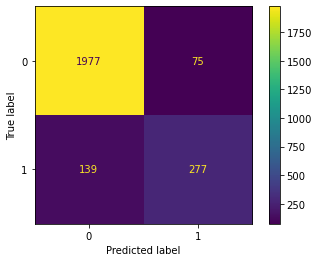

In [325]:
#confusion_matrix on train set
plot_confusion_matrix(grid,X_train_scaled, y_train,values_format='d' )


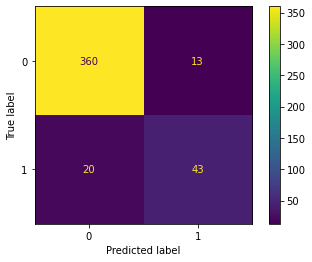

In [326]:
#confusion_matrix on test set
plot_confusion_matrix(grid,X_test_scaled, y_test,values_format='d' )


In [327]:
#create y_pred
y_pred=grid.predict(X_test_scaled)
print(y_pred)

print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

[0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[360  13]
 [ 20  43]]
Accuracy =  0.9243119266055045


In [328]:
#X_test_scaled predicted y
grid.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [329]:
#f1 scores
from sklearn.metrics import f1_score


print("f1 1: ", f1_score(y_test, y_pred,pos_label=1))
print("f1 0: ", f1_score(y_test, y_pred,pos_label=0))
print("f1: ",f1_score(y_test, y_pred, average='macro'))

f1 1:  0.7226890756302521
f1 0:  0.9561752988047808
f1:  0.8394321872175164
